# TP  PART 3: EMG - EEG Analysis (Motor Execution) 


In this practical you will learn to:

 0. *Simulate* EMG signals , preprocess and analyze them using Neurokit2 
 1. Open, analyse and visualise *real* EMG and EEG signals collected during Hand Movement 
 2. Identify EMG signal changes with movement
 3. <span style="background-color:rgba(255, 0, 0, 0.470588)">  (Advanced) Visualize EEG Event Related Desyncrhonisation (ERD) associated with movements

 
You will use data of one subject from the following EMG-BCI dataset:
 
 http://gigadb.org/dataset/view/id/100295
 
that is also described in detail here:
 
 Cho, H., Ahn, M., Ahn, S., Kwon, M., & Jun, S. C. (2017). EEG datasets for motor imagery brain–computer interface. GigaScience, 6(7).  
 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5493744/pdf/gix034.pdf
 


##  <span style="background-color:rgba(255, 0, 0, 0.470588)">  (Advanced) Event Related Desyncronization (ERD) </span>

When a movement is performed, a change in the ongoing EMG and EEG activity can be observed. In particular,a decrease or increase in EEG power in given frequency bands can be observed over motor areas. 



This change in EEG pattern is called Event Related Desyncronization (ERD) and occurs mainly in $\alpha$ $[8-13]Hz$ and $\beta$ $[14-25]Hz$  bands. It can be estimated with the following formula

$ERD=(PSD_{baseline}-PSD_{motorTask})/(PSD_{baseline})$

with $PSD_{baseline}$ being the EEG Power Spectral Density during the interval preceding the Motor task, and $PSD_{motorTask}$ being the PSD estimated for the Motor Imagery or Motor execution interval.

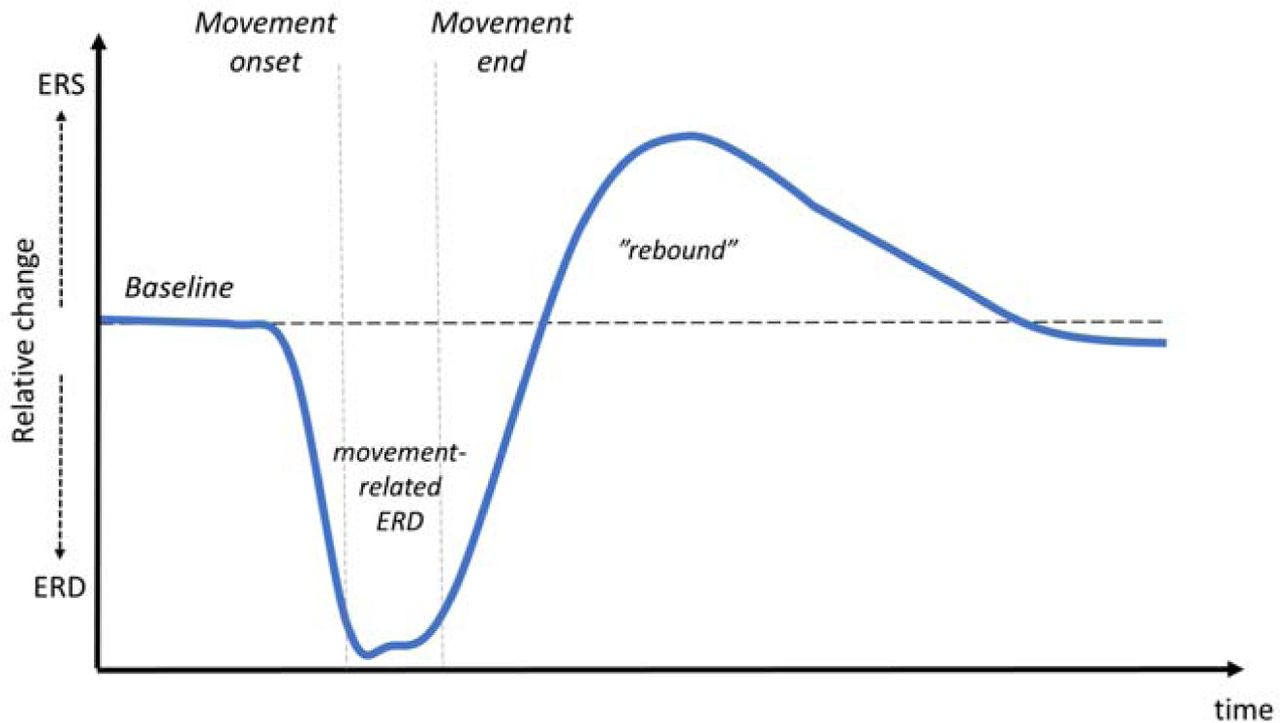


(adapted from Vinding et al, biorxiv 2018)

## Part 1 : EMG signal preprocessing and analysis

In [1]:
# Install mne
!pip install mne
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 336.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [ ]:
# Import packages

%matplotlib inline

from mne.io import read_raw_fif # This is the function to open the raw data
from mne import pick_types  # This is the function select data based on the typeof channel 
import matplotlib.pyplot as plt # We also import the plotting functions from matplotlib
import numpy as np
import neurokit2 as nk

 Let's generate a simulated EMG signal, preprocess it and plot the relative muscle activity, using the Neurokit2 package.
 n.b. the preprocessing and emg amplitude calculation is automatically implemented using default parameters: if you want to better understand how this is done, look at the [emg_clean](https://neurokit2.readthedocs.io/en/latest/_modules/neurokit2/emg/emg_clean.html#emg_clean) and [emg_aplitude](https://neurokit2.readthedocs.io/en/latest/_modules/neurokit2/emg/emg_amplitude.html#emg_amplitude)

In [ ]:
# PLAY AROUND WITH THE SIMULATION (duration, number of bursts) 
# Generate 10 seconds of EMG signal (recorded at 250 samples / second)
emg = nk.emg_simulate(duration=15, sampling_rate=250, burst_number=3)

# Process it
signal, info = nk.emg_process(emg, sampling_rate=250)
print(info)


# Visualise the processing
nk.emg_plot(signal)

Now you will try to extract EMG amplitude (muscle activation) working on real data.  The dataset includes EEG and EMG signals collected during movement of the right hand. 

**Q0 (TO BE ANSWERED) what is the sampling frequency, which channels correspond to EMG recordings?**

In [ ]:
# LOAD EEG AND EMG DATA - TO BE COMPLETED (1-0)

filepath_move='sub30_movement_right.fif'
raw=read_raw_fif(filepath_move)

# sampling freq - TO BE COMPLETED (1-1)


In [ ]:
print(raw.ch_names)
raw.plot_sensors(show_names=True)


# find the emg channels (raw.ch_names= 'emgx') - TO BE COMPLETED (1-1)
# emg channels also correspond to the channel type == 'seeg'




Preprocess eeg and emg data and plot a short segment of the  two signals

In [ ]:
# PICK EMG CHANNELS AND PREPROCESS THEM - TO BE COMPLETED (1-2)

# you need to copy  the raw data as you are going to process them differently for EEG and EMG
raw_copy=raw.copy()
#load data to filter


# detrending-remove continuous component from data (high pass filtering f=0.5 Hz) 



In [ ]:
# PLOT a SEGMENT OF EMG data from  emg electrodes - TO BE COMPLETED (1-3)


Q1 (TO BE ANSWERED)  By which singnal the EMG signals is strongly "contaminated"? 

In [ ]:
# FILTER THE EMG SIGNAL in the [70, 250] Hz BAND TO ISOLATE the EMG signal - TO BE COMPLETED (1-4) 




Now plot a longer segment (40 sec) of EMG for the electrode 'emg2' : can you indentify EMG bursts?

In [ ]:
# PLOT a 40 s SEGMENT OF EMG data and check the difference between different emg electrodes-TO BE COMPLETED (1-5)



Use np.load() to load the array with movements events 


In [ ]:
# LOAD EVENTS NUMPY ARRAY - TO BE COMPLETED (1-6) 
# np array (n_events,3)
# The first column specifies the sample number of each event,
# the second column is ignored, and the third column provides the event value.

events_move=


Now plot the first 40 seconds of the emg2 channel and the first 5 events: can you identify a correlation between movement onset and emg burst?

In [ ]:
# PLOT EVENTS and emg2 channels for the first 40 sec
times_idx=raw.times<=40
num_events=5

x=raw.times[times_idx]

plt.figure(figsize=(20,10)) 
plt.plot(x,emg_array_filt[2,0:len(x)],'g')
plt.stem(raw.times[events_move[0:num_events,0]],4000*np.ones_like(events_move[0:num_events,0]),'r')

In [ ]:
# CORRELATION BETWEEN MOVEMENT ONSET AND EMG SIGNAL (Hilbert transform) - TO BE COMPLETED (1-8)
# Use the mne function apply_hilbert: if envelope=True, the absolute value of the analytic signal for the channels defined in picks is computed, resulting in the envelope signal.



In [ ]:
# PLOT EMG signal envelope and movements onsets


## <span style="background-color:rgba(255, 0, 0, 0.470588)"> Part 2 (Advanced)Visualize EEG Power Spectral Density during movement<span>



Here you will start analyising the EEG signal during movement, exploiting the events vector to extract some average statistics across epochs

In [ ]:
eeg=raw.pick_types(eeg=True)

# add events to the raw signal instance 
raw.info['events']=events_move

eeg_filt=eeg.copy()


# Filter EEG data (see previous TP)
eeg_filt.filter(0.2,40)


In [ ]:
#Use the function mne.epochs to define epochs starting from the movement onset and then plot the 
#PSD for each electrode on the scalp using plot_psd_topomap

# TO BE COMPLETED (2-2)
